<a href="https://colab.research.google.com/github/ericycheng8/AI4CCEE_Fall_2024/blob/main/Final_Project/Yi_(Eric)_Cheng_Mini_Project_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import os
import pandas as pd

# Specify the folder path containing your CSV files
folder_path = '/content/drive/MyDrive/Mini Project 3/Accident/'  # Update with your folder name

# Filter out files that have a .csv extension
files = os.listdir(folder_path)
csv_files = [os.path.join(folder_path, f) for f in files if f.lower().endswith('.csv')]

# Initialize an empty list to store DataFrames
dataframes = []

# Read each CSV file with encoding handling
for file in csv_files:
    try:
        print(f"Reading file: {file}")
        # Attempt to read the file with utf-8 encoding
        df = pd.read_csv(file)
        dataframes.append(df)
    except UnicodeDecodeError:
        print(f"Encoding issue with {file}, trying ISO-8859-1...")
        try:
            # Fallback to ISO-8859-1 encoding
            df = pd.read_csv(file, encoding='ISO-8859-1')
            dataframes.append(df)
        except Exception as e:
            print(f"Skipping file {file} due to error: {e}")
    except Exception as e:
        print(f"Skipping file {file} due to error: {e}")

# Combine the DataFrames if there are any
if dataframes:
    try:
        # Concatenate all DataFrames vertically, including all unique columns
        combined_df = pd.concat(dataframes, axis=0, ignore_index=True, sort=False)

        # Save the combined DataFrame to a new CSV file
        output_folder_path = '/content/drive/MyDrive/Mini Project 3'
        output_file = os.path.join(output_folder_path, 'Accident_Combined_Data.csv')
        combined_df.to_csv(output_file, index=False)
        print(f"Files combined successfully into: {output_file}")
    except Exception as e:
        print(f"Error during concatenation or saving: {e}")
else:
    print("No valid CSV files found in the folder.")




Reading file: /content/drive/MyDrive/Mini Project 3/Accident/Accident 2019.csv
Encoding issue with /content/drive/MyDrive/Mini Project 3/Accident/Accident 2019.csv, trying ISO-8859-1...


<ipython-input-5-a8b6f9027fb3>:25: DtypeWarning: Columns (40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, encoding='ISO-8859-1')


Reading file: /content/drive/MyDrive/Mini Project 3/Accident/Accident 2018.csv
Reading file: /content/drive/MyDrive/Mini Project 3/Accident/Accident 2016.csv
Reading file: /content/drive/MyDrive/Mini Project 3/Accident/Accident 2017.csv


<ipython-input-5-a8b6f9027fb3>:19: DtypeWarning: Columns (40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


Reading file: /content/drive/MyDrive/Mini Project 3/Accident/Accident 2020.csv
Encoding issue with /content/drive/MyDrive/Mini Project 3/Accident/Accident 2020.csv, trying ISO-8859-1...
Reading file: /content/drive/MyDrive/Mini Project 3/Accident/Accident 2022.csv
Encoding issue with /content/drive/MyDrive/Mini Project 3/Accident/Accident 2022.csv, trying ISO-8859-1...
Reading file: /content/drive/MyDrive/Mini Project 3/Accident/Accident 2021.csv
Encoding issue with /content/drive/MyDrive/Mini Project 3/Accident/Accident 2021.csv, trying ISO-8859-1...
Files combined successfully into: /content/drive/MyDrive/Mini Project 3/Accident_Combined_Data.csv


In [ ]:
import pandas as pd

# Load the CSV file
csv_file_path = '/content/drive/MyDrive/Mini Project 3/Accident_Combined_Data.csv'  # Replace with your file path
df = pd.read_csv(csv_file_path)

# Display the first few rows of the dataset
print("First five rows of the dataset:")
print(df.head())

# Filter rows where STATENAME is 'Iowa' (case-insensitive)
filtered_df = df[df['STATENAME'].str.strip().str.lower() == 'iowa']

# Select the desired columns
selected_columns = ["STATENAME", "ST_CASE", "COUNTYNAME", "HOUR", "HOURNAME", "MINUTE", "ROUTENAME", "LATITUDE", "LONGITUD", "HARM_EVNAME", "LGT_CONDNAME", "FATALS"]
result_df = filtered_df[selected_columns]

# Save the filtered and selected data to a new CSV file
output_file_path = '/content/drive/MyDrive/Mini Project 3/Iowa_Accident_Combined_Data.csv'  # Updated file name and path
result_df.to_csv(output_file_path, index=False)

# Display success message and first few rows of the result
print(f"Filtered data saved to: {output_file_path}")
print("First five rows of the filtered data:")
print(result_df.head())


<ipython-input-6-ead6911e07d9>:5: DtypeWarning: Columns (40,42,62,64,84,86,88) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


First five rows of the dataset:
   STATE STATENAME  ST_CASE  VE_TOTAL  VE_FORMS  PVH_INVL  PEDS  PERSONS  \
0      1   Alabama    10001         2         2         0     0        3   
1      1   Alabama    10002         2         2         0     0        2   
2      1   Alabama    10003         3         3         0     0        4   
3      1   Alabama    10004         1         1         0     1        1   
4      1   Alabama    10005         1         1         0     0        1   

   PERMVIT  PERNOTMVIT  ...  HOSP_MN                        HOSP_MNNAME   CF1  \
0        3           0  ...       27                                 27   0.0   
1        2           0  ...       99  Unknown EMS Hospital Arrival Time   0.0   
2        4           0  ...        5                                  5  14.0   
3        1           1  ...       88   Not Applicable (Not Transported)   0.0   
4        1           0  ...       88   Not Applicable (Not Transported)   0.0   

                        

In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Load the road shapefile
road_shapefile_path = '/content/drive/MyDrive/Mini Project 3/Road_Network.shp'  # Replace with your road shapefile path
gdf_roads = gpd.read_file(road_shapefile_path)

# Load the crash CSV file
crash_csv_path = '/content/drive/MyDrive/Mini Project 3/Iowa_Accident_Combined_Data.csv'  # Replace with your crash CSV file path
df_crashes = pd.read_csv(crash_csv_path)


In [ ]:
# prompt: print head fof df_crashes

print(df_crashes.head())


  STATENAME  ST_CASE        COUNTYNAME  HOUR         HOURNAME  MINUTE  \
0      Iowa   190001  BUENA VISTA (21)    10  10:00am-10:59am      57   
1      Iowa   190002        PAGE (145)     8    8:00am-8:59am      33   
2      Iowa   190003   VAN BUREN (177)    23  11:00pm-11:59pm      43   
3      Iowa   190004     CHEROKEE (35)     9    9:00am-9:59am       9   
4      Iowa   190005     WEBSTER (187)     5    5:00am-5:59am      21   

      ROUTENAME   LATITUDE   LONGITUD                     HARM_EVNAME  \
0  U.S. Highway  42.836219 -95.151183      Motor Vehicle In-Transport   
1   County Road  40.770319 -95.032950      Motor Vehicle In-Transport   
2   County Road  40.732822 -91.991075  Immersion or Partial Immersion   
3   County Road  42.747417 -95.523989                  Guardrail Face   
4  U.S. Highway  42.506233 -94.217178               Rollover/Overturn   

         LGT_CONDNAME  FATALS  
0            Daylight       1  
1            Daylight       1  
2  Dark - Not Lighted     

In [ ]:
print(gdf_roads.head())


   OBJECTID                                    ID      ROUTEID  FROMMEASUR  \
0   6542149  d65d24c7-1b26-42e5-8d8a-d0b653f7b3fc  C000447330E    4.798238   
1   6542150  420d2e08-5eef-4309-94d5-5d7ae3d5541d  M604041020N    0.023451   
2   6542151  2423d20b-b6ad-4051-9a9d-526ca05bd1eb  M204241080N    0.207326   
3   6542152  000585ad-0f55-4b6a-b721-0b77a6db9b56  C001546340E    0.993502   
4   6542153  5b409d30-2ae6-49e9-bb4d-82144cdbf486  M322241220N    0.246720   

   TOMEASURE  COUNTY_NUM  OWNER_CODE  ROAD_SYSTE  ROAD_STATU STATE_ROUT  ...  \
0   5.303400         4.0         2.0         4.0         0.0       None  ...   
1   0.069557         8.0         4.0         4.0         0.0       None  ...   
2   0.207337        60.0         4.0         4.0         0.0       None  ...   
3   1.104834        15.0         2.0         4.0         1.0       None  ...   
4   0.246747        35.0         4.0         4.0         0.0       None  ...   

  UTC_OFFSET AADT_YEAR PERCENT_TR TRUCK_AADT TRUCK

In [ ]:
# Ensure the CSV has longitude and latitude columns
longitude_col = 'LONGITUD'  # Replace with your longitude column name
latitude_col = 'LATITUDE'    # Replace with your latitude column name

# Convert crash CSV to GeoDataFrame
geometry = [Point(xy) for xy in zip(df_crashes[longitude_col], df_crashes[latitude_col])]
gdf_crashes = gpd.GeoDataFrame(df_crashes, geometry=geometry, crs="EPSG:4326")  # Initial CRS: WGS84 (geographic)

# Reproject both GeoDataFrames to a projected CRS (e.g., EPSG:3857 for meters)
projected_crs = "EPSG:3857"  # Replace with the appropriate projected CRS
gdf_roads = gdf_roads.to_crs(projected_crs)
gdf_crashes = gdf_crashes.to_crs(projected_crs)
gdf_crashes.info()
# Apply a buffer to the road geometries
buffer_distance = 5  # Buffer distance in meters
gdf_roads['geometry'] = gdf_roads.geometry.buffer(buffer_distance)

# Perform the spatial join using 'predicate'
spatial_join_result = gpd.sjoin(gdf_crashes, gdf_roads, how="inner", predicate="intersects")

# Save the result to a new file or process further
output_folder = '/content/drive/MyDrive/Mini Project 3/'
output_file_name = 'spatial_join_with_buffer_result.shp'
output_path = f'{output_folder}{output_file_name}'
spatial_join_result.to_file(output_path)

# Display the first few rows of the output
print(f"File saved to: {output_path}")
print(spatial_join_result.head(20))

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2206 entries, 0 to 2205
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   STATENAME     2206 non-null   object  
 1   ST_CASE       2206 non-null   int64   
 2   COUNTYNAME    2206 non-null   object  
 3   HOUR          2206 non-null   int64   
 4   HOURNAME      2206 non-null   object  
 5   MINUTE        2206 non-null   int64   
 6   ROUTENAME     2206 non-null   object  
 7   LATITUDE      2206 non-null   float64 
 8   LONGITUD      2206 non-null   float64 
 9   HARM_EVNAME   2206 non-null   object  
 10  LGT_CONDNAME  2206 non-null   object  
 11  FATALS        2206 non-null   int64   
 12  geometry      2206 non-null   geometry
dtypes: float64(2), geometry(1), int64(4), object(6)
memory usage: 224.2+ KB


<ipython-input-14-584c3035c09e>:25: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  spatial_join_result.to_file(output_path)
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'HARM_EVNAME' to 'HARM_EVNAM'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'LGT_CONDNAME' to 'LGT_CONDNA'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'index_right' to 'index_righ'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Field EDITDATE create as date field, though DateTime requested.
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Field RUN_DATE create as date field, though DateTime requested.
  ogr_write(


File saved to: /content/drive/MyDrive/Mini Project 3/spatial_join_with_buffer_result.shp
   STATENAME  ST_CASE        COUNTYNAME  HOUR         HOURNAME  MINUTE  \
0       Iowa   190001  BUENA VISTA (21)    10  10:00am-10:59am      57   
1       Iowa   190002        PAGE (145)     8    8:00am-8:59am      33   
3       Iowa   190004     CHEROKEE (35)     9    9:00am-9:59am       9   
3       Iowa   190004     CHEROKEE (35)     9    9:00am-9:59am       9   
4       Iowa   190005     WEBSTER (187)     5    5:00am-5:59am      21   
5       Iowa   190006        TAMA (171)     0    0:00am-0:59am      11   
6       Iowa   190007       MILLS (129)    17    5:00pm-5:59pm      56   
6       Iowa   190007       MILLS (129)    17    5:00pm-5:59pm      56   
6       Iowa   190007       MILLS (129)    17    5:00pm-5:59pm      56   
7       Iowa   190008     HARRISON (85)    18    6:00pm-6:59pm      43   
8       Iowa   190009   MUSCATINE (139)    14    2:00pm-2:59pm      31   
8       Iowa   190009  

In [ ]:
print(spatial_join_result.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 2908 entries, 0 to 2203
Columns: 120 entries, STATENAME to Shape__Len
dtypes: datetime64[ms](2), float64(69), geometry(1), int32(2), int64(5), object(41)
memory usage: 2.7+ MB
None


In [ ]:
# Drop duplicate records based on 'case_number', keeping only the first occurrence
spatial_join_result_unique = spatial_join_result.drop_duplicates(subset='ST_CASE', keep='first')

# Save the deduplicated result to a new file
deduplicated_output_folder = '/content/drive/MyDrive/Mini Project 3/'
deduplicated_output_file_name = 'deduplicated_spatial_join_result.shp'
deduplicated_output_path = f'{deduplicated_output_folder}{deduplicated_output_file_name}'
spatial_join_result_unique.to_file(deduplicated_output_path)

# Display the first few rows of the deduplicated output
print(f"File saved to: {deduplicated_output_path}")
print(spatial_join_result_unique.head(20))


<ipython-input-12-bbca1ddc85cf>:8: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  spatial_join_result_unique.to_file(deduplicated_output_path)


File saved to: /content/drive/MyDrive/Mini Project 3/deduplicated_spatial_join_result.shp
   STATENAME  ST_CASE           COUNTYNAME  HOUR         HOURNAME  MINUTE  \
0       Iowa   190001     BUENA VISTA (21)    10  10:00am-10:59am      57   
1       Iowa   190002           PAGE (145)     8    8:00am-8:59am      33   
3       Iowa   190004        CHEROKEE (35)     9    9:00am-9:59am       9   
5       Iowa   190006           TAMA (171)     0    0:00am-0:59am      11   
6       Iowa   190007          MILLS (129)    17    5:00pm-5:59pm      56   
7       Iowa   190008        HARRISON (85)    18    6:00pm-6:59pm      43   
8       Iowa   190009      MUSCATINE (139)    14    2:00pm-2:59pm      31   
9       Iowa   190010           BOONE (15)     7    7:00am-7:59am      31   
10      Iowa   190011            CLAY (41)     3    3:00am-3:59am      41   
12      Iowa   190013           POLK (153)    12  12:00pm-12:59pm      16   
13      Iowa   190014            CASS (29)    22  10:00pm-10:59

/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'HARM_EVNAME' to 'HARM_EVNAM'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'LGT_CONDNAME' to 'LGT_CONDNA'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'index_right' to 'index_righ'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Field EDITDATE create as date field, though DateTime requested.
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Field RUN_DATE create as date field, though DateTime requested.
  ogr_write(


<Figure size 1000x800 with 0 Axes>

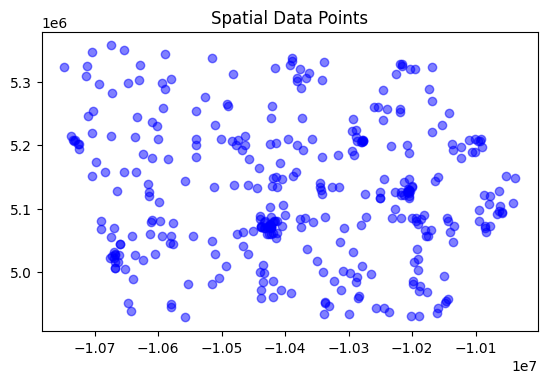

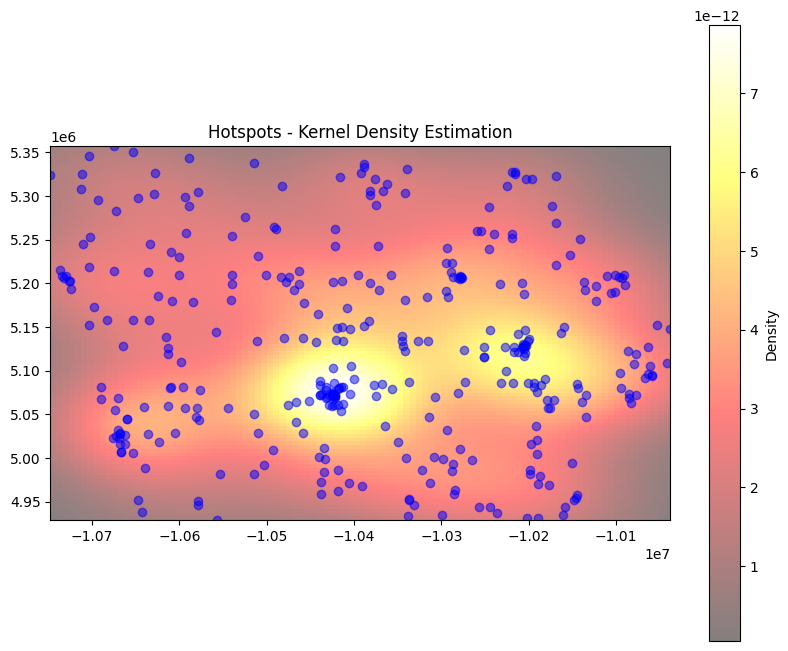

In [ ]:
# Import necessary libraries
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde

# Load the shapefile
file_path = '/content/drive/MyDrive/Mini Project 3/deduplicated_spatial_join_result.shp'  # Update with your actual file path
data = gpd.read_file(file_path)

# Ensure the data is in a projected coordinate system for spatial analysis
data = data.to_crs(epsg=3395)  # EPSG:3395 is an example for meter-based projection

# Plot the raw data for visualization
plt.figure(figsize=(10, 8))
data.plot(marker='o', color='blue', alpha=0.5)
plt.title('Spatial Data Points')
plt.show()

# Convert to centroids if working with polygons
if data.geom_type.iloc[0] == 'Polygon' or data.geom_type.iloc[0] == 'MultiPolygon':
    data['geometry'] = data.centroid

# Check for a crash or fatality density column and normalize it for KDE if present
if 'crash_density' in data.columns:
    weights = data['crash_density'].values
else:
    weights = None

# Create a Kernel Density Estimation (KDE) plot for hotspot visualization
# Extract coordinates
coords = [(point.x, point.y) for point in data.geometry]
xs, ys = zip(*coords)

# Perform KDE with weights if available
density = gaussian_kde([xs, ys], weights=weights)
X, Y = np.meshgrid(
    np.linspace(min(xs), max(xs), 100),
    np.linspace(min(ys), max(ys), 100)
)
pos = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(density(pos).T, X.shape)

# Plot KDE result
plt.figure(figsize=(10, 8))
plt.imshow(Z, extent=[min(xs), max(xs), min(ys), max(ys)], origin='lower', cmap='hot', alpha=0.5)
data.plot(ax=plt.gca(), marker='o', color='blue', alpha=0.5)
plt.title('Hotspots - Kernel Density Estimation')
plt.colorbar(label='Density')
plt.show()


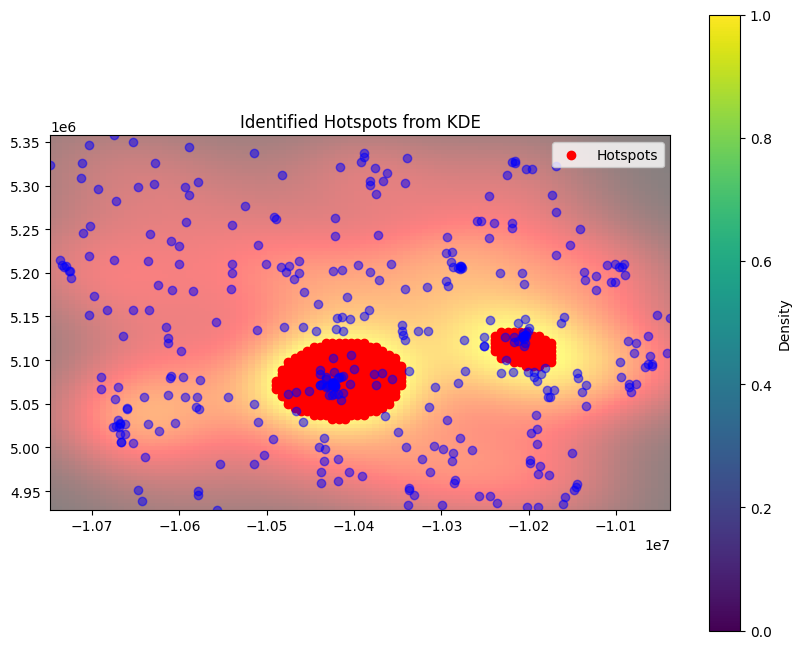

Hotspot Characteristics:
                   X             Y       Density
count  4.140000e+02  4.140000e+02  4.140000e+02
mean  -1.037492e+07  5.083885e+06  6.613976e-12
std    8.961840e+04  2.535505e+04  5.965691e-13
min   -1.048953e+07  5.032618e+06  5.871377e-12
25%   -1.043932e+07  5.062945e+06  6.088853e-12
50%   -1.040346e+07  5.084607e+06  6.467940e-12
75%   -1.036042e+07  5.106269e+06  7.077809e-12
max   -1.017392e+07  5.132263e+06  7.867448e-12


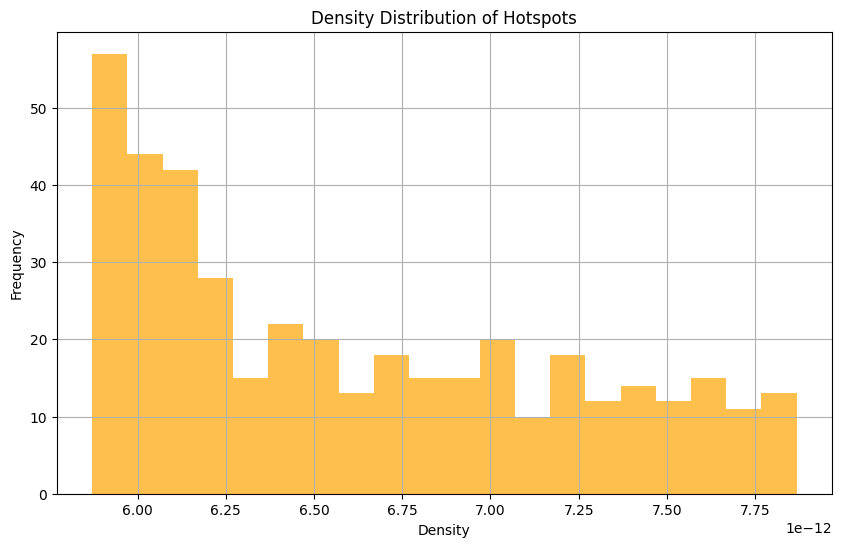

/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -10424976.1130225658 of field X of feature 0 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -10417803.0585970711 of field X of feature 1 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -10410630.0041715782 of field X of feature 2 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -10446495.2762990482 of field X of feature 3 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -10439

Hotspot shapefile saved to /content/drive/MyDrive/Mini Project 3/kde_hotspots.shp
Hotspot data saved to /content/drive/MyDrive/Mini Project 3/kde_hotspots.csv


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde
# Analyze KDE Hotspots
threshold = Z.mean() + 2 * Z.std()  # Define a threshold for significant density
hotspot_indices = np.where(Z > threshold)

# Extract hotspot coordinates
hotspot_coords = [(X[i, j], Y[i, j]) for i, j in zip(hotspot_indices[0], hotspot_indices[1])]

# Plot identified hotspots
plt.figure(figsize=(10, 8))
plt.imshow(Z, extent=[min(xs), max(xs), min(ys), max(ys)], origin='lower', cmap='hot', alpha=0.5)
plt.scatter([coord[0] for coord in hotspot_coords], [coord[1] for coord in hotspot_coords], color='red', label='Hotspots')
data.plot(ax=plt.gca(), marker='o', color='blue', alpha=0.5)
plt.legend()
plt.title('Identified Hotspots from KDE')
plt.colorbar(label='Density')
plt.show()

# Create a DataFrame for Hotspot Characteristics
hotspot_density_values = [Z[i, j] for i, j in zip(hotspot_indices[0], hotspot_indices[1])]
hotspot_df = pd.DataFrame({
    'X': [coord[0] for coord in hotspot_coords],
    'Y': [coord[1] for coord in hotspot_coords],
    'Density': hotspot_density_values
})

# Generate Statistical Summaries
stats = hotspot_df.describe()
print("Hotspot Characteristics:\n", stats)

# Plot Statistical Graphs
plt.figure(figsize=(10, 6))
hotspot_df['Density'].plot(kind='hist', bins=20, color='orange', alpha=0.7)
plt.title('Density Distribution of Hotspots')
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Save Hotspot Data to a Shapefile and CSV
gdf_hotspots = gpd.GeoDataFrame(
    hotspot_df, geometry=[Point(x, y) for x, y in zip(hotspot_df['X'], hotspot_df['Y'])],
    crs=data.crs
)
output_shapefile_path = '/content/drive/MyDrive/Mini Project 3/kde_hotspots.shp'
gdf_hotspots.to_file(output_shapefile_path)
print(f"Hotspot shapefile saved to {output_shapefile_path}")

output_csv_path = '/content/drive/MyDrive/Mini Project 3/kde_hotspots.csv'
hotspot_df.to_csv(output_csv_path, index=False)
print(f"Hotspot data saved to {output_csv_path}")

<Figure size 1000x800 with 0 Axes>

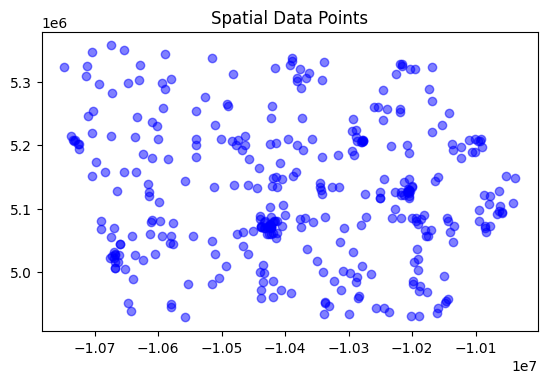

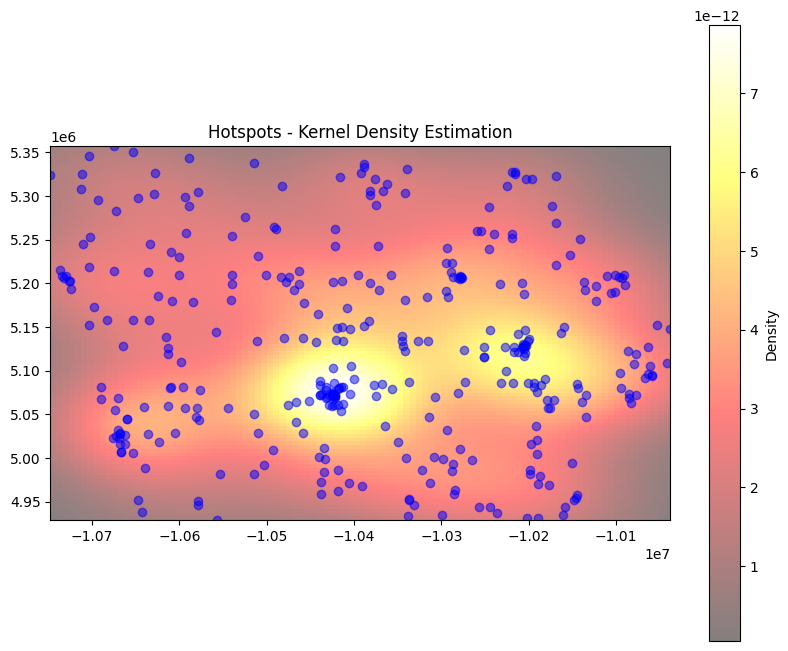

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
<ipython-input-6-2c1b81c87e90>:102: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_hotspots.to_file(output_shapefile_path)


Model RMSE: 6.019288768094297e-13
Model R2 Score: -0.003402506631704494
Feature Importance:
           Feature  Importance
0               X         0.0
1               Y         0.0
2      Road_Width         0.0
3  Traffic_Volume         0.0


/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Traffic_Volume' to 'Traffic_Vo'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -10424976.1130225658 of field X of feature 0 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -10417803.0585970711 of field X of feature 1 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -10410630.0041715782 of field X of feature 2 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value -10446495.2762990482 of field X of feature 3 not successfully written. Possibly

Hotspot shapefile saved to /content/drive/MyDrive/Mini Project 3/kde_hotspots.shp
Hotspot data saved to /content/drive/MyDrive/Mini Project 3/kde_hotspots.csv


In [ ]:
# Import necessary libraries
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the shapefile
file_path = '/content/drive/MyDrive/Mini Project 3/deduplicated_spatial_join_result.shp'  # Update with your actual file path
data = gpd.read_file(file_path)

# Ensure the data is in a projected coordinate system for spatial analysis
data = data.to_crs(epsg=3395)  # EPSG:3395 is an example for meter-based projection

# Plot the raw data for visualization
plt.figure(figsize=(10, 8))
data.plot(marker='o', color='blue', alpha=0.5)
plt.title('Spatial Data Points')
plt.show()

# Convert to centroids if working with polygons
if data.geom_type.iloc[0] == 'Polygon' or data.geom_type.iloc[0] == 'MultiPolygon':
    data['geometry'] = data.centroid

# Create a Kernel Density Estimation (KDE) plot for hotspot visualization
# Extract coordinates
coords = [(point.x, point.y) for point in data.geometry]
xs, ys = zip(*coords)

# Perform KDE
kde = gaussian_kde([xs, ys])
X, Y = np.meshgrid(
    np.linspace(min(xs), max(xs), 100),
    np.linspace(min(ys), max(ys), 100)
)
pos = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(kde(pos).T, X.shape)

# Plot KDE result
plt.figure(figsize=(10, 8))
plt.imshow(Z, extent=[min(xs), max(xs), min(ys), max(ys)], origin='lower', cmap='hot', alpha=0.5)
data.plot(ax=plt.gca(), marker='o', color='blue', alpha=0.5)
plt.title('Hotspots - Kernel Density Estimation')
plt.colorbar(label='Density')
plt.show()

# Analyze KDE Hotspots
threshold = Z.mean() + 2 * Z.std()  # Define a threshold for significant density
hotspot_indices = np.where(Z > threshold)

# Extract hotspot coordinates
hotspot_coords = [(X[i, j], Y[i, j]) for i, j in zip(hotspot_indices[0], hotspot_indices[1])]

# Create a DataFrame for Hotspot Characteristics
hotspot_density_values = [Z[i, j] for i, j in zip(hotspot_indices[0], hotspot_indices[1])]
hotspot_df = pd.DataFrame({
    'X': [coord[0] for coord in hotspot_coords],
    'Y': [coord[1] for coord in hotspot_coords],
    'Density': hotspot_density_values
})

# Generate a predictive model for crash likelihood
# Assuming additional features are available, generate synthetic features for demonstration
hotspot_df['Road_Width'] = np.random.uniform(5, 20, len(hotspot_df))  # Example feature: road width in meters
hotspot_df['Traffic_Volume'] = np.random.uniform(100, 1000, len(hotspot_df))  # Example feature: traffic volume

# Prepare the dataset for modeling
X_features = hotspot_df[['X', 'Y', 'Road_Width', 'Traffic_Volume']]
y_target = hotspot_df['Density']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
predictions = model.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)
print(f"Model RMSE: {rmse}")
print(f"Model R2 Score: {r2}")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X_features.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("Feature Importance:\n", feature_importance)

# Save Hotspot Data to a Shapefile and CSV
gdf_hotspots = gpd.GeoDataFrame(
    hotspot_df, geometry=[Point(x, y) for x, y in zip(hotspot_df['X'], hotspot_df['Y'])],
    crs=data.crs
)
output_shapefile_path = '/content/drive/MyDrive/Mini Project 3/kde_hotspots.shp'
gdf_hotspots.to_file(output_shapefile_path)
print(f"Hotspot shapefile saved to {output_shapefile_path}")

output_csv_path = '/content/drive/MyDrive/Mini Project 3/kde_hotspots.csv'
hotspot_df.to_csv(output_csv_path, index=False)
print(f"Hotspot data saved to {output_csv_path}")


First few rows of the shapefile data:
  STATENAME  ST_CASE        COUNTYNAME  HOUR         HOURNAME  MINUTE  \
0      Iowa   190001  BUENA VISTA (21)    10  10:00am-10:59am      57   
1      Iowa   190002        PAGE (145)     8    8:00am-8:59am      33   
2      Iowa   190004     CHEROKEE (35)     9    9:00am-9:59am       9   
3      Iowa   190006        TAMA (171)     0    0:00am-0:59am      11   
4      Iowa   190007       MILLS (129)    17    5:00pm-5:59pm      56   

      ROUTENAME   LATITUDE   LONGITUD                  HARM_EVNAM  ...  \
0  U.S. Highway  42.836219 -95.151183  Motor Vehicle In-Transport  ...   
1   County Road  40.770319 -95.032950  Motor Vehicle In-Transport  ...   
2   County Road  42.747417 -95.523989              Guardrail Face  ...   
3   County Road  42.007044 -92.664481                     Culvert  ...   
4   County Road  41.142200 -95.695742                       Ditch  ...   

  UTC_OFFSET  AADT_YEAR  PERCENT_TR  TRUCK_AADT TRUCK_AA_1  \
0       -05:    

<Axes: >

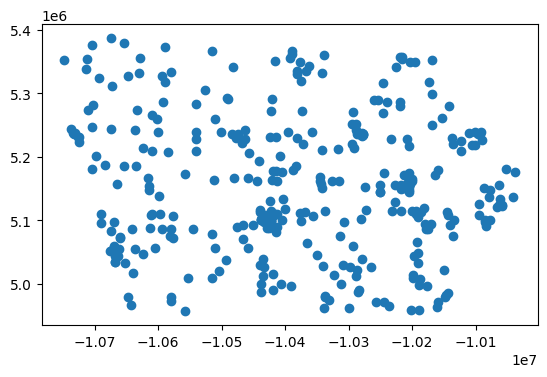

In [ ]:
import geopandas as gpd

# Load the shapefile
shapefile_path = '/content/drive/MyDrive/Mini Project 3/deduplicated_spatial_join_result.shp'
roads_gdf = gpd.read_file(shapefile_path)

# Display the first few rows of the shapefile data
print("First few rows of the shapefile data:")
print(roads_gdf.head())

# Display column names
print("Columns in the shapefile:", roads_gdf.columns)

# Summary of data types and non-null counts
print("Shapefile information:")
print(roads_gdf.info())

# Descriptive statistics for numeric fields
print("Descriptive statistics for numeric fields:")
print(roads_gdf.describe())

# Check the coordinate reference system (CRS)
print("Coordinate Reference System (CRS):", roads_gdf.crs)

# Plot the shapefile (optional, requires matplotlib)
roads_gdf.plot()


In [ ]:
import pandas as pd
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the shapefile
data = gpd.read_file('/content/drive/MyDrive/Mini Project 3/deduplicated_spatial_join_result.shp')

# Inspect data
print(data.head())
print(data.columns)

# Select relevant features and target variable
features = ['HOUR', 'MINUTE', 'LATITUDE', 'LONGITUD', 'AADT_YEAR', 'PERCENT_TR', 'TRUCK_AADT', 'Shape__Len']
# Assuming 'HARM_EVNAM' as a proxy for crash severity or likelihood
target = 'HARM_EVNAM'

# Drop rows with missing values in the selected columns
data = data[features + [target]].dropna()

# Encode categorical target variable
label_encoder = LabelEncoder()
data[target] = label_encoder.fit_transform(data[target])

# Split data into features and target
X = data[features]
y = data[target]

# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature importance
feature_importances = pd.DataFrame({'Feature': features, 'Importance': rf_model.feature_importances_})
print(feature_importances.sort_values(by='Importance', ascending=False))


  STATENAME  ST_CASE        COUNTYNAME  HOUR         HOURNAME  MINUTE  \
0      Iowa   190001  BUENA VISTA (21)    10  10:00am-10:59am      57   
1      Iowa   190002        PAGE (145)     8    8:00am-8:59am      33   
2      Iowa   190004     CHEROKEE (35)     9    9:00am-9:59am       9   
3      Iowa   190006        TAMA (171)     0    0:00am-0:59am      11   
4      Iowa   190007       MILLS (129)    17    5:00pm-5:59pm      56   

      ROUTENAME   LATITUDE   LONGITUD                  HARM_EVNAM  ...  \
0  U.S. Highway  42.836219 -95.151183  Motor Vehicle In-Transport  ...   
1   County Road  40.770319 -95.032950  Motor Vehicle In-Transport  ...   
2   County Road  42.747417 -95.523989              Guardrail Face  ...   
3   County Road  42.007044 -92.664481                     Culvert  ...   
4   County Road  41.142200 -95.695742                       Ditch  ...   

  UTC_OFFSET  AADT_YEAR  PERCENT_TR  TRUCK_AADT TRUCK_AA_1  \
0       -05:     2023.0        14.0       553.0     20

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

  STATENAME  ST_CASE        COUNTYNAME  HOUR         HOURNAME  MINUTE  \
0      Iowa   190001  BUENA VISTA (21)    10  10:00am-10:59am      57   
1      Iowa   190002        PAGE (145)     8    8:00am-8:59am      33   
2      Iowa   190004     CHEROKEE (35)     9    9:00am-9:59am       9   
3      Iowa   190006        TAMA (171)     0    0:00am-0:59am      11   
4      Iowa   190007       MILLS (129)    17    5:00pm-5:59pm      56   

      ROUTENAME   LATITUDE   LONGITUD                  HARM_EVNAM  ...  \
0  U.S. Highway  42.836219 -95.151183  Motor Vehicle In-Transport  ...   
1   County Road  40.770319 -95.032950  Motor Vehicle In-Transport  ...   
2   County Road  42.747417 -95.523989              Guardrail Face  ...   
3   County Road  42.007044 -92.664481                     Culvert  ...   
4   County Road  41.142200 -95.695742                       Ditch  ...   

  UTC_OFFSET  AADT_YEAR  PERCENT_TR  TRUCK_AADT TRUCK_AA_1  \
0       -05:     2023.0        14.0       553.0     20

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

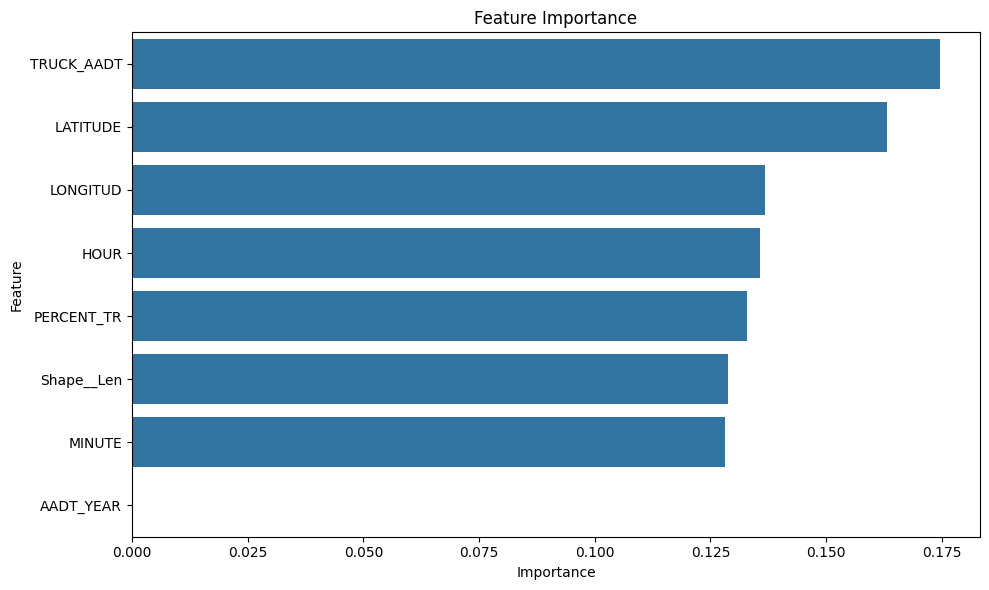

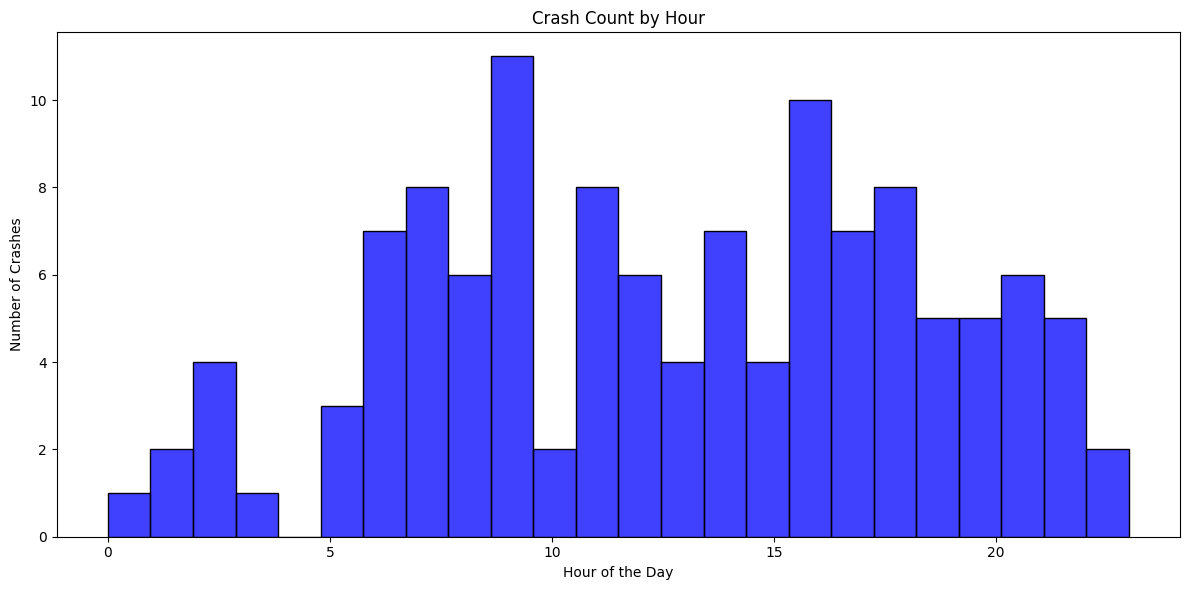

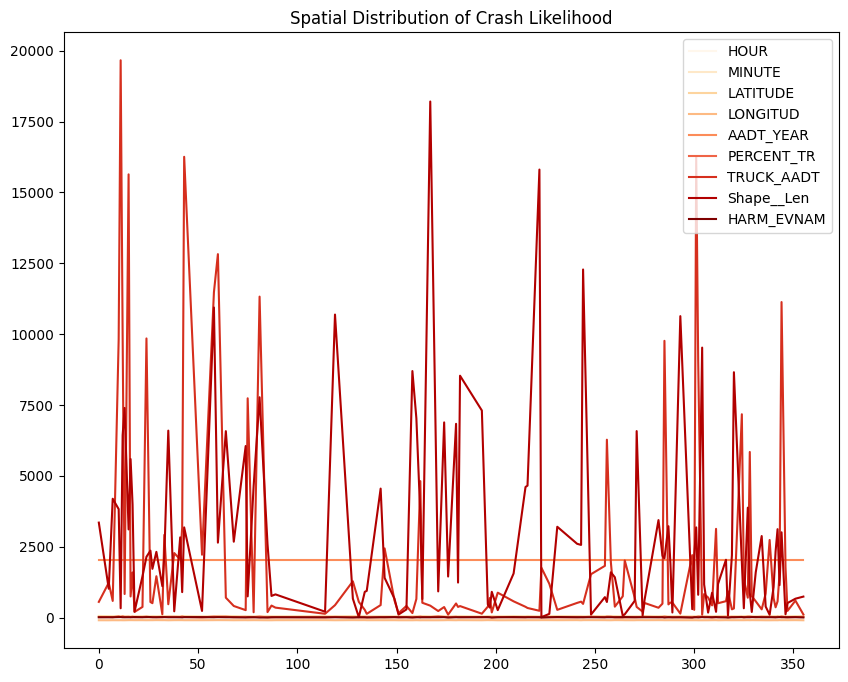

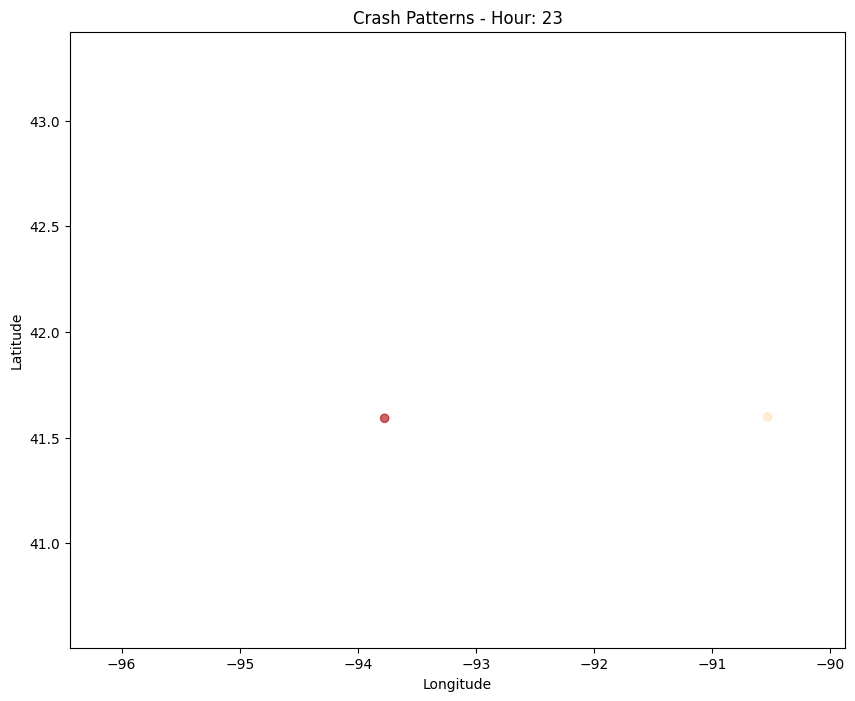

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the shapefile
data = gpd.read_file('/content/drive/MyDrive/Mini Project 3/deduplicated_spatial_join_result.shp')

# Inspect data
print(data.head())
print(data.columns)

# Select relevant features and target variable
features = ['HOUR', 'MINUTE', 'LATITUDE', 'LONGITUD', 'AADT_YEAR', 'PERCENT_TR', 'TRUCK_AADT', 'Shape__Len']
# Assuming 'HARM_EVNAM' as a proxy for crash severity or likelihood
target = 'HARM_EVNAM'

# Drop rows with missing values in the selected columns
data = data[features + [target]].dropna()

# Encode categorical target variable
label_encoder = LabelEncoder()
data[target] = label_encoder.fit_transform(data[target])

# Split data into features and target
X = data[features]
y = data[target]

# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature importance
feature_importances = pd.DataFrame({'Feature': features, 'Importance': rf_model.feature_importances_})
print(feature_importances.sort_values(by='Importance', ascending=False))

# Visualization: Feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.sort_values(by='Importance', ascending=False))
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Visualization: Crash patterns by time
plt.figure(figsize=(12, 6))
sns.histplot(data, x='HOUR', bins=24, kde=False, color='blue')
plt.title('Crash Count by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crashes')
plt.tight_layout()
plt.show()

# Visualization: Spatial distribution of crashes
data.plot(column=target, cmap='OrRd', legend=True, figsize=(10, 8))
plt.title('Spatial Distribution of Crash Likelihood')
plt.show()

# Create a time-lapse animation (using time and location)
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(10, 8))
sc = ax.scatter(data['LONGITUD'], data['LATITUDE'], c=data[target], cmap='OrRd', alpha=0.6)
plt.title('Crash Patterns Over Time')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Update function for animation
def update(frame):
    current_data = data[data['HOUR'] == frame]
    sc.set_offsets(current_data[['LONGITUD', 'LATITUDE']])
    sc.set_array(current_data[target])
    ax.set_title(f'Crash Patterns - Hour: {frame}')

ani = FuncAnimation(fig, update, frames=range(24), interval=500)
ani.save('crash_patterns_timelapse.gif', writer='imagemagick')
plt.show()


KeyError: 'LGT_CONDNAME'

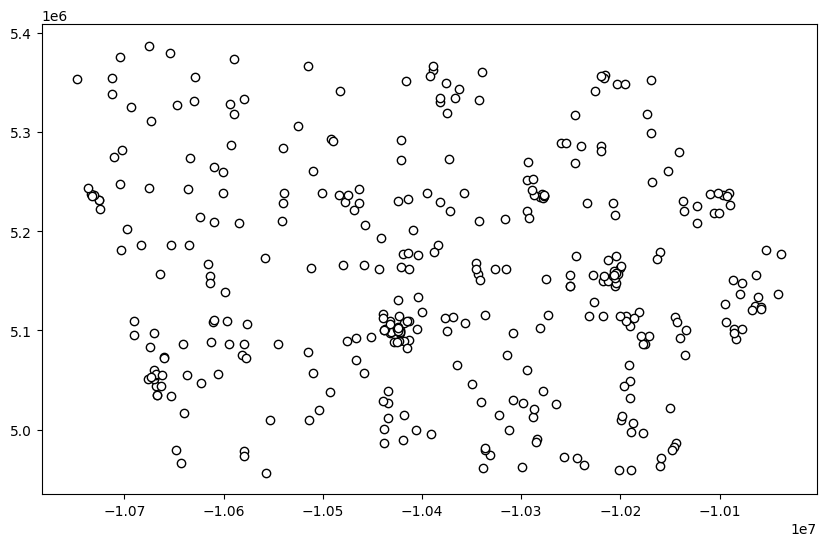

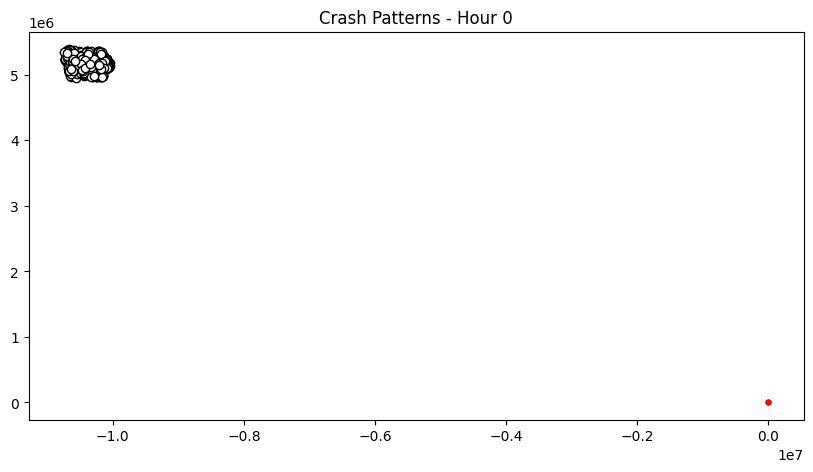

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd

# Load the shapefile
data = gpd.read_file("/content/drive/MyDrive/Mini Project 3/deduplicated_spatial_join_result.shp")

# Ensure 'HOUR' and 'HOURNAME' are integers and properly formatted
data['HOUR'] = pd.to_numeric(data['HOUR'], errors='coerce')
data['HOURNAME'] = data['HOURNAME'].astype(str)
data = data.dropna(subset=['LATITUDE', 'LONGITUD'])

# Create a base map
base = data.plot(color='white', edgecolor='black', figsize=(10, 8))

# Helper function to filter data by hour
def filter_by_hour(hour):
    return data[data['HOUR'] == hour]

# Initialize the animation
fig, ax = plt.subplots(figsize=(10, 8))
base = data.plot(ax=ax, color='white', edgecolor='black')
sc = ax.scatter([], [], s=10, color='red', alpha=0.7)

def update(frame):
    ax.clear()
    base = data.plot(ax=ax, color='white', edgecolor='black')
    filtered = filter_by_hour(frame)
    sc = ax.scatter(filtered['LONGITUD'], filtered['LATITUDE'], s=10, color='red', alpha=0.7)
    ax.set_title(f'Crash Patterns - Hour {frame}')
    return sc,

ani = FuncAnimation(fig, update, frames=range(24), repeat=False, blit=False)

# Save the animation as a video file
ani.save('crash_patterns_by_hour.mp4', writer='ffmpeg', fps=2)

# For light conditions, create static plots and animations
def filter_by_light_condition(condition):
    return data[data['LGT_CONDNAME'] == condition]

light_conditions = data['LGT_CONDNAME'].unique()

# Static plots by light condition
for condition in light_conditions:
    filtered = filter_by_light_condition(condition)
    plt.figure(figsize=(10, 8))
    base = data.plot(color='white', edgecolor='black')
    plt.scatter(filtered['LONGITUD'], filtered['LATITUDE'], s=10, alpha=0.7, label=condition)
    plt.title(f"Crashes under {condition}")
    plt.legend()
    plt.savefig(f"crashes_{condition}.png")
    plt.close()

# Animation by light condition
fig, ax = plt.subplots(figsize=(10, 8))
base = data.plot(ax=ax, color='white', edgecolor='black')
sc = ax.scatter([], [], s=10, color='blue', alpha=0.7)

def update_light_condition(frame):
    ax.clear()
    base = data.plot(ax=ax, color='white', edgecolor='black')
    condition = light_conditions[frame]
    filtered = filter_by_light_condition(condition)
    sc = ax.scatter(filtered['LONGITUD'], filtered['LATITUDE'], s=10, color='blue', alpha=0.7)
    ax.set_title(f'Crash Patterns - Light Condition: {condition}')
    return sc,

ani_light = FuncAnimation(fig, update_light_condition, frames=range(len(light_conditions)), repeat=False, blit=False)

# Save the animation as a video file
ani_light.save('crash_patterns_by_light_condition.mp4', writer='ffmpeg', fps=2)

print("Visualizations and animations created successfully.")


<ipython-input-1-da1eaf97fa03>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = label_encoders[col].fit_transform(data_cleaned[col])
<ipython-input-1-da1eaf97fa03>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = label_encoders[col].fit_transform(data_cleaned[col])
<ipython-input-1-da1eaf97fa03>:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.16739393 -1.03107536  1.73270523  0.35081493 -0

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        25

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



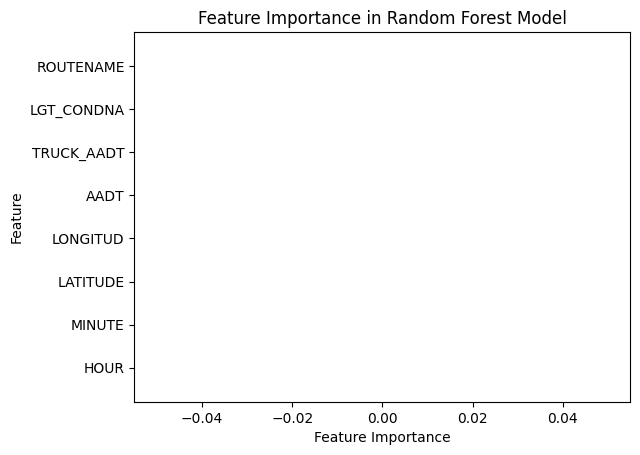

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
file_path = '/content/deduplicated_spatial_join_result.csv'  # Update the file path if needed
data = pd.read_csv(file_path)

# Define target and feature columns
target_column = 'FATALS'  # Target variable
selected_features = ['HOUR', 'MINUTE', 'LATITUDE', 'LONGITUD', 'AADT', 'TRUCK_AADT', 'LGT_CONDNA', 'ROUTENAME']

# Drop rows with missing target or features
data_cleaned = data.dropna(subset=[target_column] + selected_features)

# Encode categorical variables
categorical_features = ['LGT_CONDNA', 'ROUTENAME']
label_encoders = {col: LabelEncoder() for col in categorical_features}

for col in categorical_features:
    data_cleaned[col] = label_encoders[col].fit_transform(data_cleaned[col])

# Split the data into train-test sets
X = data_cleaned[selected_features]
y = (data_cleaned[target_column] > 0).astype(int)  # Binary classification: 1 if FATALS > 0, else 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train.iloc[:, :4] = scaler.fit_transform(X_train.iloc[:, :4])
X_test.iloc[:, :4] = scaler.transform(X_test.iloc[:, :4])

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

# Feature importance visualization
import matplotlib.pyplot as plt

feature_importances = rf_model.feature_importances_
plt.barh(selected_features, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model")
plt.show()


<ipython-input-2-cf7056fe5983>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=geo_data, x='HOUR', palette='viridis')


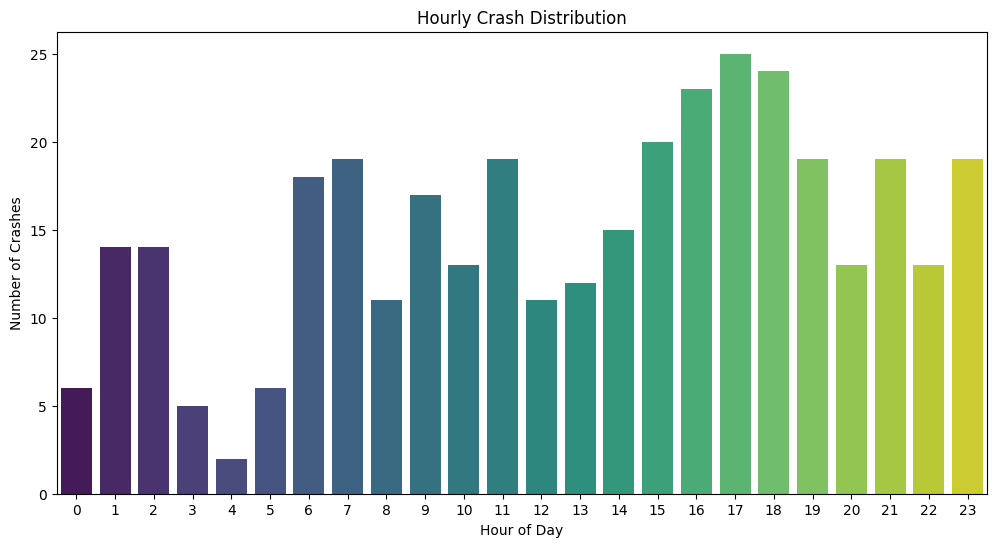

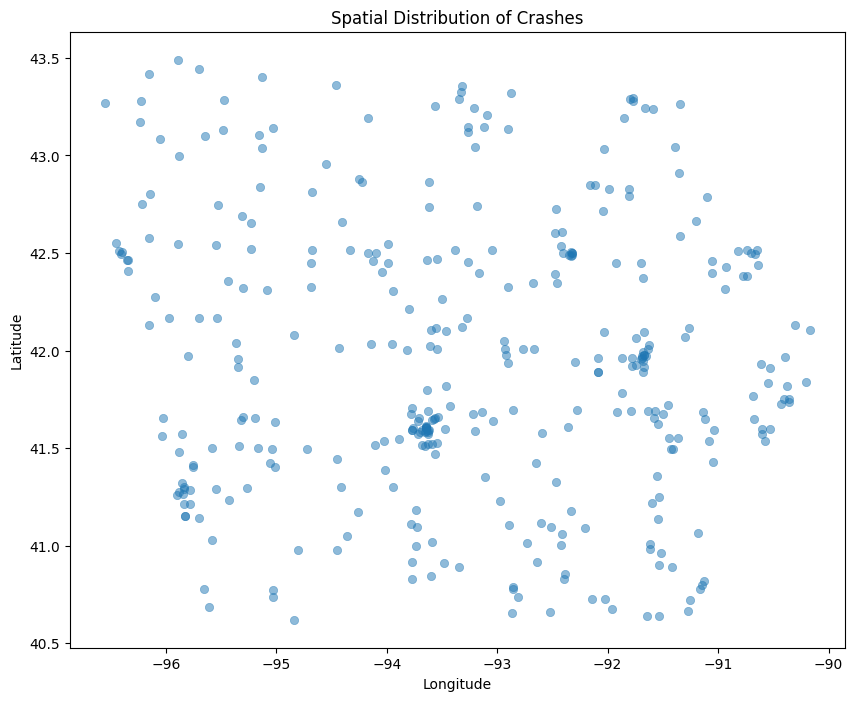

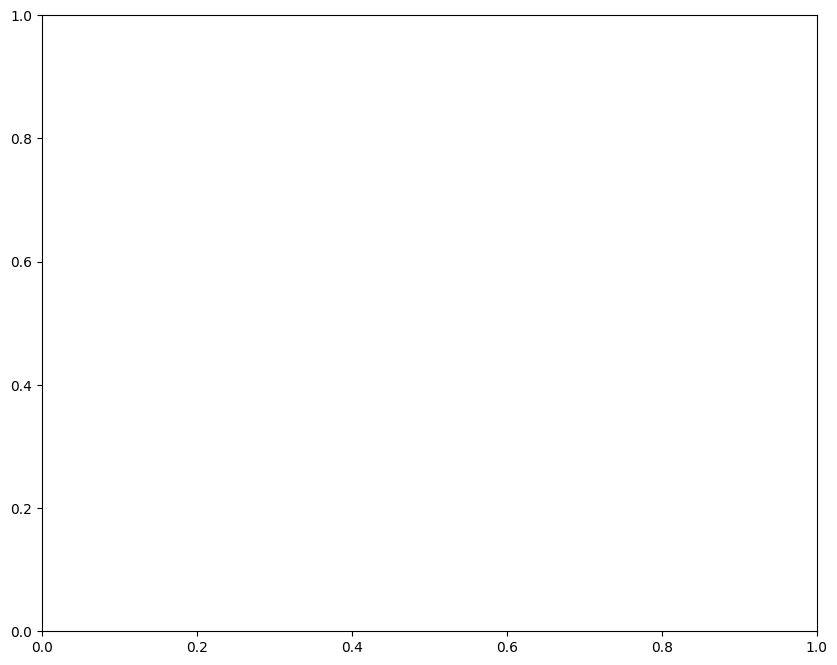

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.animation import FuncAnimation

# Load the dataset
file_path = '/content/deduplicated_spatial_join_result.csv'  # Update as needed
data = pd.read_csv(file_path)

# Ensure columns are numeric for visualization
data['HOUR'] = pd.to_numeric(data['HOUR'], errors='coerce')
data['LATITUDE'] = pd.to_numeric(data['LATITUDE'], errors='coerce')
data['LONGITUD'] = pd.to_numeric(data['LONGITUD'], errors='coerce')

# Filter for non-null geographical data
geo_data = data.dropna(subset=['LATITUDE', 'LONGITUD', 'HOUR'])

# --- STATIC VISUALIZATIONS ---
# 1. Hourly crash patterns
plt.figure(figsize=(12, 6))
sns.countplot(data=geo_data, x='HOUR', palette='viridis')
plt.title('Hourly Crash Distribution')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes')
plt.xticks(range(0, 24))
plt.show()

# 2. Crash density by latitude and longitude
plt.figure(figsize=(10, 8))
sns.scatterplot(data=geo_data, x='LONGITUD', y='LATITUDE', alpha=0.5, edgecolor=None)
plt.title('Spatial Distribution of Crashes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# --- TIME-LAPSE ANIMATION USING PLOTLY ---
# Add a time-based column if available
if 'EDITDATE' in geo_data.columns:
    geo_data['EDITDATE'] = pd.to_datetime(geo_data['EDITDATE'])

    # Create animation using Plotly Express
    fig = px.scatter_mapbox(
        geo_data,
        lat="LATITUDE",
        lon="LONGITUD",
        color="HOUR",
        size_max=10,
        zoom=6,
        mapbox_style="carto-positron",
        animation_frame=geo_data['EDITDATE'].dt.date.astype(str),
        title="Crash Patterns Over Time",
    )
    fig.show()

# --- TIME-LAPSE ANIMATION USING MATPLOTLIB ---
# Prepare data for time-lapse
time_steps = sorted(geo_data['HOUR'].unique())

fig, ax = plt.subplots(figsize=(10, 8))

def update(hour):
    ax.clear()
    subset = geo_data[geo_data['HOUR'] == hour]
    ax.scatter(subset['LONGITUD'], subset['LATITUDE'], alpha=0.5)
    ax.set_title(f'Crash Patterns at Hour {hour}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_xlim(geo_data['LONGITUD'].min(), geo_data['LONGITUD'].max())
    ax.set_ylim(geo_data['LATITUDE'].min(), geo_data['LATITUDE'].max())

ani = FuncAnimation(fig, update, frames=time_steps, interval=1000)
plt.show()
